# **Week 6 Activity**

## Description

### *We are going to carry out different tasks on the economical data of different countries. This data contains the details of 196 countries across various regions in the world*

### Tasks

#### 1) Find out how many countries are there in the dataset. 
#### 2) Examine the data by using visualizations. 
#### 3) Find out how many countries with respect to the region are availablein the dataset.
#### 4) On average which region has the highest
- GDP per capita (current US$)
- International trade: Imports (million US$)
#### 5) Find out which region has more consistent with respect to GDP percapita (current US$).

### 1) Find out how many countries are there in the dataset.

In [1]:
# NumPy Library as np
import numpy as np
# Matplot Library as mpl
import matplotlib as mpl
# Matplot Library - PyPlot as plt
import matplotlib.pyplot as plt
# Pandas Library as pd
import pandas as pd
# Seaborn Library as sns
import seaborn as sns

In [7]:
# Reading the 'Dataset_w6.xlsx' file using read_excel()
Dataset = pd.read_excel('Dataset_w6.xlsx')
# Displaying the first 5 observations using the head()
Dataset.head()

,country,Region,Surface area (km2),Population in thousands (2017),GDP per capita (current US$),Agricultural production index,International trade: Imports (million US$)
0,Afghanistan,SouthernAsia,652864,35530,623,125,3568
1,Albania,SouthernEurope,28748,2930,"3,984",134,4669
2,Algeria,NorthernAfrica,2381741,41318,"4,154",160,47091
3,Angola,MiddleAfrica,1246700,29784,"4,714",175,8790
4,Antigua and Barbuda,Caribbean,442,102,"14,764",88,491


In [6]:
# Checking for null values
Dataset[Dataset.isna().any(axis=1)]

,country,Region,Surface_area_(km2),Population_in_thousands_(2017),GDP_per_capita_(current_US$),Agricultural_production_index,International_trade:_Imports_(million_US$)


In [42]:
# No Null values Found!
# Displaying the country count using Dataframe.category.count()
print('This Dataframe consists of economical details of',Dataset.country.count(),'countries.')
# Alternative method: Dataset.country.unique().size

This Dataframe consists of economical details of 196 countries.


### 2) Examine the data by using visualizations.

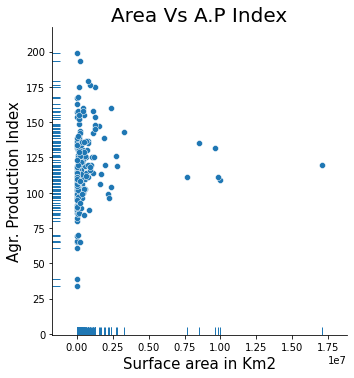

In [76]:
sns.relplot(data=Dataset, x="Surface_area (km2)", y="Agricultural production index")
sns.rugplot(data=Dataset, x="Surface_area (km2)", y="Agricultural production index")
plt.xlabel("Surface area in Km2", fontsize='15')
plt.ylabel("Agr. Production Index", fontsize='15')
plt.title("Area Vs A.P Index", fontsize='20')
plt.show()

In [3]:
# Defining our data for the plot        
Dataset1 = pd.DataFrame(Dataset, columns=['country', 'Population in thousands (2017)'])
data_sorted = Dataset1.sort_values(by='Population in thousands (2017)', ascending=False)
pd.options.display.float_format = '{:,.0f}'.format
data_sorted.set_index('country', inplace=True)
ranking = data_sorted.head(10)
ranking    

,Population in thousands (2017)
country,
China,1409517
India,1339180
United States of America,324460
Indonesia,263991
Brazil,209288
Pakistan,197016
Nigeria,190886
Bangladesh,164670
Russia,143990


Text(0.5, 69.0, 'Population in thousands (2017)')

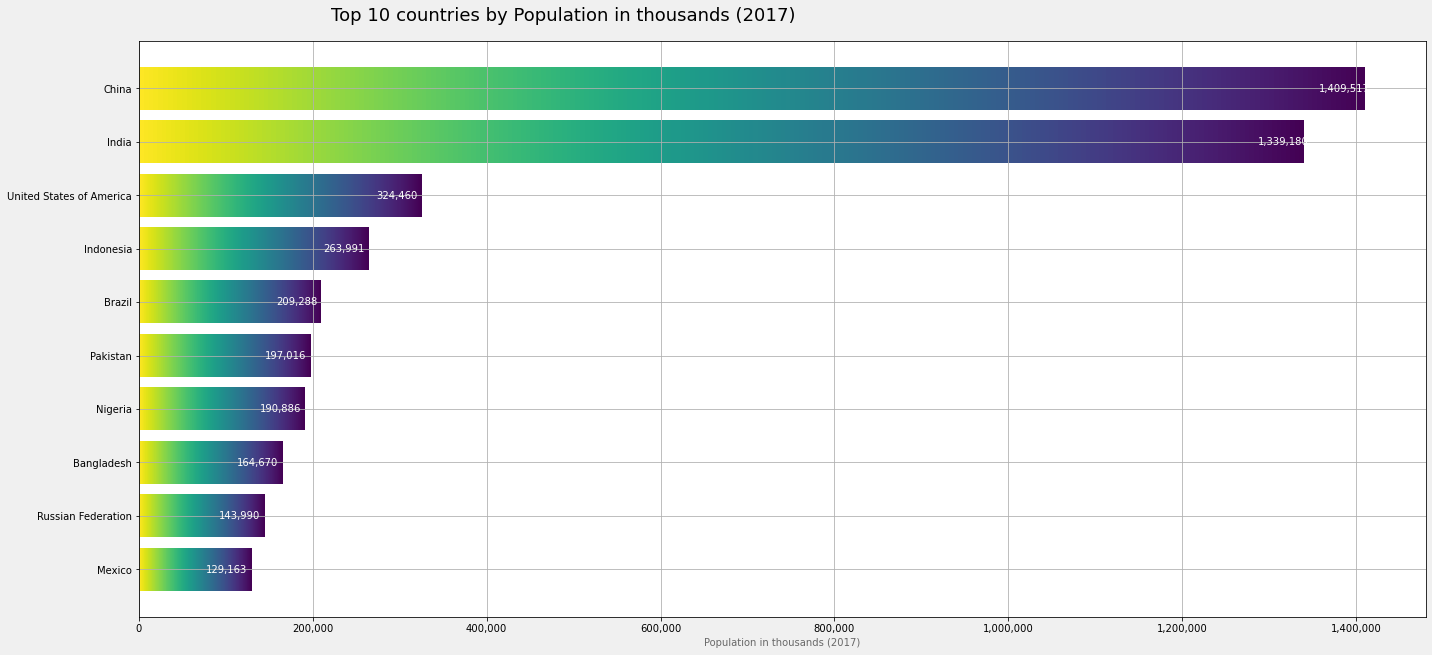

In [126]:
# Variables used in plot
index = ranking.index
values = ranking['Population in thousands (2017)']
plot_title = 'Top 10 countries by Population in thousands (2017)'
title_size = 18
x_label = 'Population in thousands (2017)'
ranking.sort_values(by='Population in thousands (2017)', inplace=True, ascending=True)
# Plot initiating
fig, ax = plt.subplots(figsize=(20,10), facecolor=(.94, .94, .94))
mpl.pyplot.viridis()
bar = ax.barh(index, values)
plt.tight_layout()
ax.xaxis.set_major_formatter(mpl.ticker.StrMethodFormatter('{x:,.0f}'))
title = plt.title(plot_title, pad=20, fontsize=title_size)
title.set_position([.33, 1])
plt.subplots_adjust(top=0.9, bottom=0.1)
ax.grid(zorder=0)

def gradientbars(bars):
    grad = np.atleast_2d(np.linspace(0,1,256))
    ax = bars[0].axes
    lim = ax.get_xlim()+ax.get_ylim()
    for bar in bars:
        bar.set_zorder(1)
        bar.set_facecolor('none')
        x,y = bar.get_xy()
        w, h = bar.get_width(), bar.get_height()
        ax.imshow(grad, extent=[x+w, x, y, y+h], aspect='auto', zorder=1)
    ax.axis(lim)
gradientbars(bar)
rects = ax.patches

# Placing a label for each bar
for rect in rects:
    # Get X and Y placement of label from rect
    x_value = rect.get_width()
    y_value = rect.get_y() + rect.get_height() / 2

    # Number of points between bar and label
    space = -45
    # Vertical alignment for positive values
    ha = 'left'

    # If value of bar is negative: place label to the left of the bar
    if x_value < 0:
        # Invert space to place label to the left
        space *= -1
        # Horizontally align label to the right
        ha = 'right'

    # Use X value as label and format number
    label = '{:,.0f}'.format(x_value)

    # Create annotation
    plt.annotate(
        label,                      # Use `label` as label
        (x_value, y_value),         # Place label at bar end
        xytext=(space, 0),          # Horizontally shift label by `space`
        textcoords='offset points', # Interpret `xytext` as offset in points
        va='center',                # Vertically center label
        ha=ha,                      # Horizontally align label differently for positive and negative values
        color = 'white')            # Change label color to white
             
#Set x-label
ax.set_xlabel(x_label, color='#696969')    

In [4]:
# Defining our data for the plot 
Dataset2 = Dataset.loc[:,['country','GDP per capita (current US$)','International trade: Imports (million US$)']]
Dataset2.set_index('country', inplace=True)
Dataset2['GDP per capita (current US$)'] = Dataset2['GDP per capita (current US$)'].astype(float)
Dataset2['International trade: Imports (million US$)'] = Dataset2['International trade: Imports (million US$)'].astype(float)
Dataset2 = Dataset2.sort_values(by='GDP per capita (current US$)', ascending=False).head(10)
Dataset2

,GDP per capita (current US$),International trade: Imports (million US$)
country,,
Luxembourg,"100,161","19,124"
Bermuda,"94,400",971
Switzerland,"80,831","269,157"
Macao,"78,586","8,924"
Norway,"74,186","72,473"
Qatar,"73,653","32,058"
Cayman Islands,"62,132",991
Ireland,"60,514","76,997"
United States of America,"56,054","2,249,661"


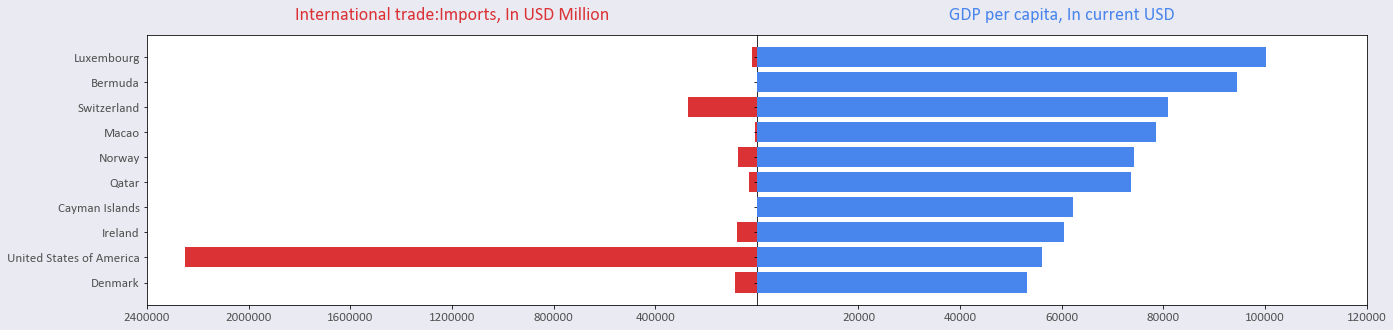

In [5]:
# Variables used in plot
font_color = '#525252'
hfont = {'fontname':'Calibri'}
facecolor = '#eaeaf2'
color_red = '#db3236'
color_blue = '#4885ed'
index = Dataset2.index
column0 = Dataset2['International trade: Imports (million US$)']
column1 = Dataset2['GDP per capita (current US$)']
title0 = 'International trade:Imports, In USD Million'
title1 = 'GDP per capita, In current USD'
# Initiating plot
fig, axes = plt.subplots(figsize=(22,5), facecolor=facecolor, ncols=2, sharey=True)
fig.tight_layout()

axes[0].barh(index, column0, align='center', color=color_red, zorder=10)
axes[0].set_title(title0, fontsize=18, pad=15, color=color_red, **hfont)
axes[1].barh(index, column1, align='center', color=color_blue, zorder=10)
axes[1].set_title(title1, fontsize=18, pad=15, color=color_blue, **hfont)

# If you have positive numbers and want to invert the x-axis of the left plot
axes[0].invert_xaxis() 

# To show data from highest to lowest
plt.gca().invert_yaxis()

axes[0].set(yticks=Dataset2.index, yticklabels=Dataset2.index)
axes[0].yaxis.tick_left()
axes[0].tick_params(axis='y', colors='black') # tick color

axes[0].set_xticks([400000, 800000, 1200000, 1600000, 2000000, 2400000])

axes[0].set_xticklabels([400000, 800000, 1200000, 1600000, 2000000, 2400000])

axes[1].set_xticks([20000, 40000, 60000, 80000, 100000, 120000])

axes[1].set_xticklabels([20000, 40000, 60000, 80000, 100000, 120000])

for label in (axes[0].get_xticklabels() + axes[0].get_yticklabels()):
    label.set(fontsize=13, color=font_color, **hfont)
for label in (axes[1].get_xticklabels() + axes[1].get_yticklabels()):
    label.set(fontsize=13, color=font_color, **hfont)
    
plt.subplots_adjust(wspace=0, top=0.85, bottom=0.1, left=0.18, right=0.95)

### Insights :
- Economically sound nations less rely on Imports (USA is an exception).
- Poulation wise China and India are in Top 2 positions, But they failed to find a position in Top 10 nations by GDP. But USA which is an example of Developed nation, secured the 9th position even though it is third by population ranking.
- Agriculture Production Index is not propotional to the Availability of Land.

### 3) Find out how many countries with respect to the region are availablein the dataset.

In [30]:
# Getting the Region specific country count (Sorted by count) using Dataframe.category.value_counts('Filters')
Dataset.Region.value_counts(sort=True).to_frame()
# Alternative method : Dataset.loc[:,['Region','country']].groupby('Region').size().to_frame()

,Region
WesternAsia,18
EasternAfrica,17
Caribbean,16
WesternAfrica,15
SouthAmerica,12
SouthernEurope,12
South-easternAsia,11
EasternEurope,10
NorthernEurope,10
SouthernAsia,9


### Notes :
Top 3 Regions by country count in the Dataframe
- WesternAsia with 18 countries
- EasternAfrica with 17 countries
- Caribbean region with 16 countries

### 4) On average which region has the highest
- GDP per capita (current US$)
- International trade: Imports (million US$)

In [10]:
# By GDP per capita (current US$)
Dataset[['Region','GDP per capita (current US$)']].groupby('Region').mean().sort_values('GDP per capita (current US$)',ascending=False).head()

,GDP per capita (current US$)
Region,
NorthernAmerica,"57,659"
WesternEurope,"55,387"
Oceania,"44,823"
NorthernEurope,"42,098"
EasternAsia,"27,968"


### Notes :
Top 3 Regions by Mean GDP per Capital (In USD)
- Northern America
- Western Europe
- Oceania

**Northern America has the highest Avg. GDP per capital worth 57659$**

In [9]:
# By International trade: Imports (million US$)
Dataset[['Region','International trade: Imports (million US$)']].groupby('Region').mean().sort_values('International trade: Imports (million US$)',ascending=False).head()

,International trade: Imports (million US$)
Region,
NorthernAmerica,"663,552"
EasternAsia,"451,995"
WesternEurope,"407,498"
NorthernEurope,"113,407"
Oceania,"112,914"


### Notes :
Top 3 Regions by Mean International trade: Imports (In million USD)
- Northern America
- Eastern Asia
- Western Europe

**Northern America has the highest Avg. International trade: Imports (In million USD) worth 663552.25**

### 5) Find out which region has more consistent with respect to GDP percapita (current US$).

In [8]:
Dataset[['Region','GDP per capita (current US$)']].mode()

,Region,GDP per capita (current US$)
0,WesternAsia,"1,106"


### Notes :
**WesternAsia has has more consistent with respect to GDP per capital**